In [12]:
import pandas as pd

file_path = "E:/My Folder/UTD/Maven Analytics/Python/Airbnb+Data/Airbnb Data/Listings.csv"

df = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory = False)

df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [13]:
df.dtypes 

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [14]:
df['host_since'] = pd.to_datetime(df['host_since'])

df.dtypes 

listing_id                              int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_response_time                     object
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                      object
host_total_listings_count             float64
host_has_profile_pic                   object
host_identity_verified                 object
neighbourhood                          object
district                               object
city                                   object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bedrooms                              float64
amenities                         

In [18]:
paris_listings = (
    df
    .query("city == 'Paris'")
    .loc[:,["host_since","neighbourhood","city","accommodates","price"]]
)

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [20]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [21]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [24]:
paris_listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [26]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price" : "mean"})
    .sort_values("price")

)

paris_listings_neighbourhood

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


In [27]:
paris_listings_accomodations = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price" : "mean"})
    .sort_values("price")

)

paris_listings_accomodations

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462


In [28]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({
        "neighbourhood": "count",
        "price" : "mean"
    })
)

paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8871,114.159847


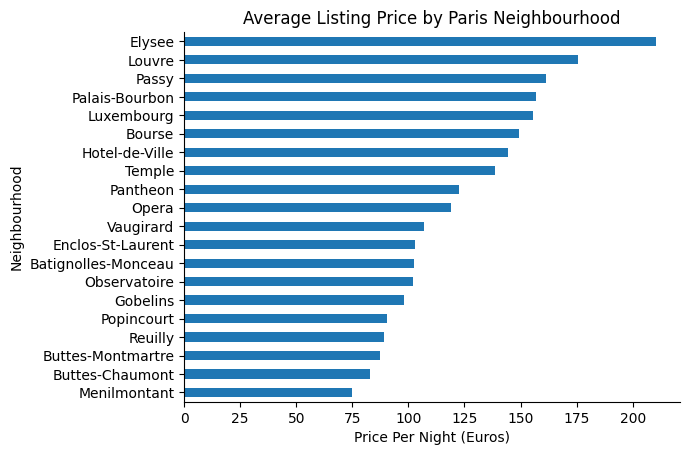

In [32]:
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh(
     title = "Average Listing Price by Paris Neighbourhood",
     xlabel = "Price Per Night (Euros)",
     ylabel = "Neighbourhood",
     legend = None
 )
)

sns.despine()

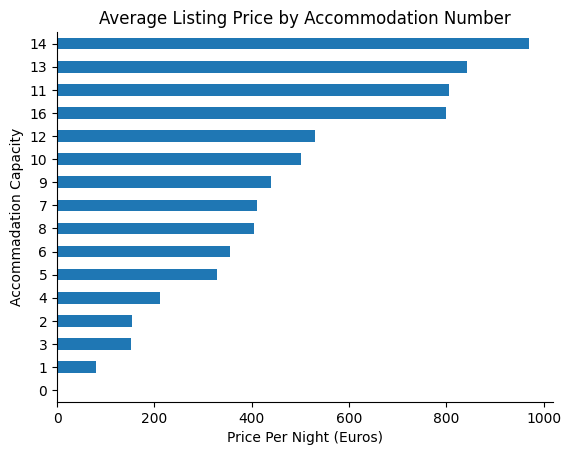

In [33]:
(paris_listings_accomodations
 .plot
 .barh(
     title = "Average Listing Price by Accommodation Number",
     xlabel = "Price Per Night (Euros)",
     ylabel = "Accommadation Capacity",
     legend = None
 )
)

sns.despine()

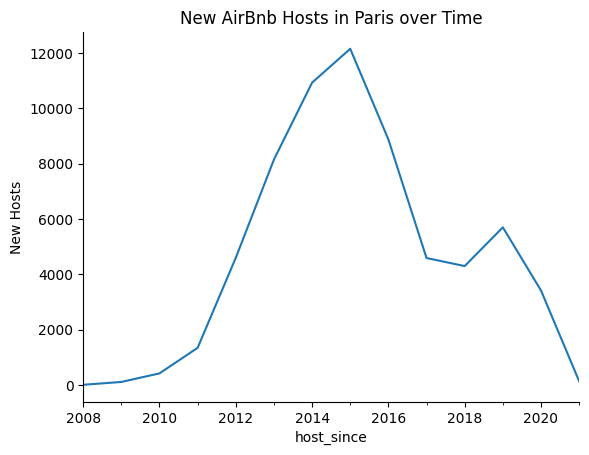

In [36]:
paris_listings_over_time ["neighbourhood"].plot(
    ylabel = "New Hosts",
    title = "New AirBnb Hosts in Paris over Time"
)

sns.despine()

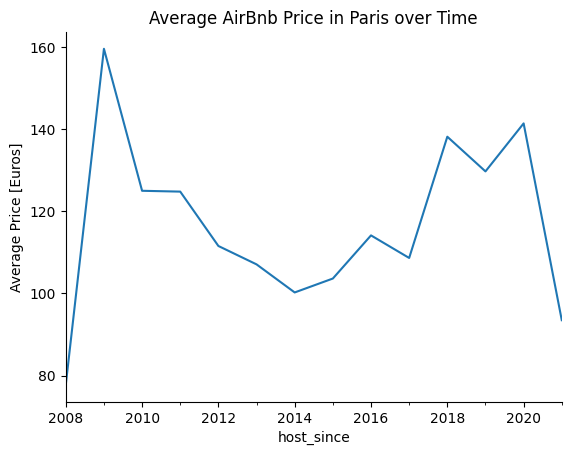

In [37]:
paris_listings_over_time ["price"].plot(
    ylabel = "Average Price [Euros]",
    title = "Average AirBnb Price in Paris over Time"
)

sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to fewer new Hosts and High Prices')

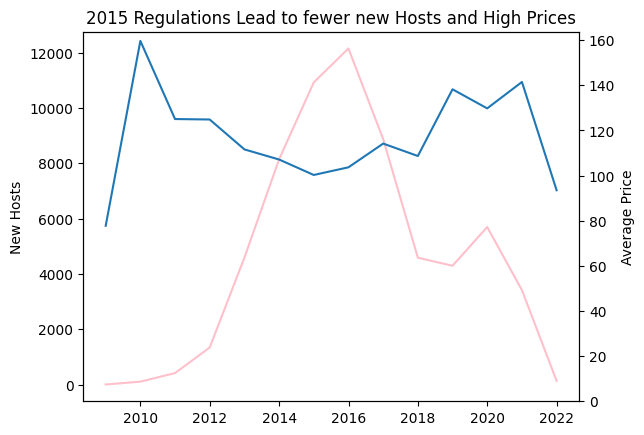

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label = "New Hosts",
    c= "pink"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label = "Average Price",
)
ax2.set_ylim(0)

ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations Lead to fewer new Hosts and High Prices")